Using device: cpu
Train Epoch: 1 [0/12000 (0%)]	Loss: 2.290263
Train Epoch: 1 [6400/12000 (53%)]	Loss: 1.119458

Test set: Average loss: 0.0212, Accuracy: 6035/10000 (60%)

Epoch 1 completed in 7.91 seconds
Estimated remaining time: 1.19 minutes
Train Epoch: 2 [0/12000 (0%)]	Loss: 1.693792
Train Epoch: 2 [6400/12000 (53%)]	Loss: 0.425605

Test set: Average loss: 0.0050, Accuracy: 9101/10000 (91%)

Epoch 2 completed in 7.67 seconds
Estimated remaining time: 1.02 minutes
Train Epoch: 3 [0/12000 (0%)]	Loss: 0.246541
Train Epoch: 3 [6400/12000 (53%)]	Loss: 0.132762

Test set: Average loss: 0.0057, Accuracy: 8882/10000 (89%)

Epoch 3 completed in 7.96 seconds
Estimated remaining time: 0.93 minutes
Train Epoch: 4 [0/12000 (0%)]	Loss: 0.124475
Train Epoch: 4 [6400/12000 (53%)]	Loss: 0.215827

Test set: Average loss: 0.0034, Accuracy: 9350/10000 (94%)

Epoch 4 completed in 7.94 seconds
Estimated remaining time: 0.79 minutes
Train Epoch: 5 [0/12000 (0%)]	Loss: 0.358152
Train Epoch: 5 [6400/1200

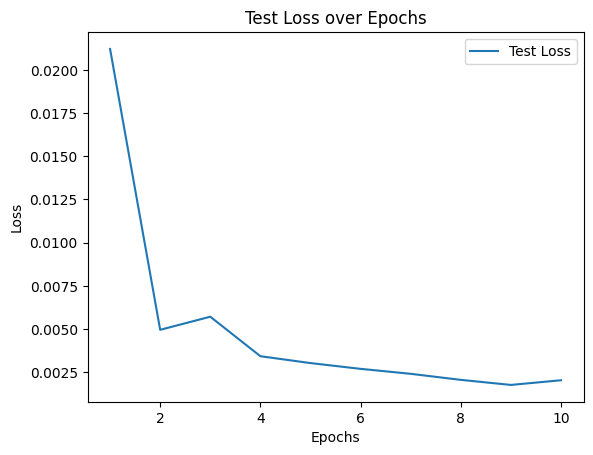

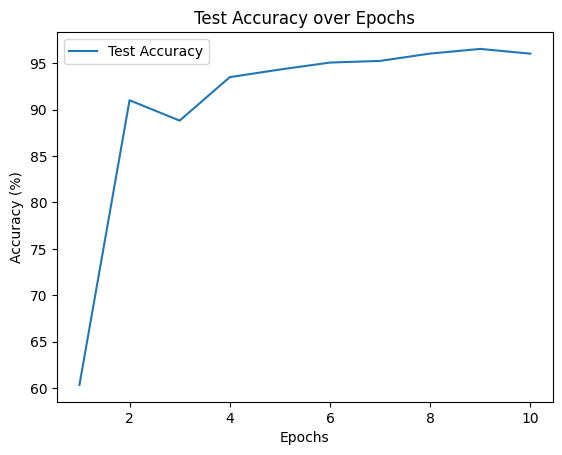

Train Epoch: 1 [0/12000 (0%)]	Loss: 0.067604
Train Epoch: 1 [6400/12000 (53%)]	Loss: 0.070953

Test set: Average loss: 0.0016, Accuracy: 9705/10000 (97%)

Train Epoch: 2 [0/12000 (0%)]	Loss: 0.109348
Train Epoch: 2 [6400/12000 (53%)]	Loss: 0.044407

Test set: Average loss: 0.0015, Accuracy: 9702/10000 (97%)

Train Epoch: 3 [0/12000 (0%)]	Loss: 0.066061
Train Epoch: 3 [6400/12000 (53%)]	Loss: 0.103494

Test set: Average loss: 0.0015, Accuracy: 9714/10000 (97%)

Train Epoch: 4 [0/12000 (0%)]	Loss: 0.235804
Train Epoch: 4 [6400/12000 (53%)]	Loss: 0.026200

Test set: Average loss: 0.0015, Accuracy: 9697/10000 (97%)

Train Epoch: 5 [0/12000 (0%)]	Loss: 0.066559
Train Epoch: 5 [6400/12000 (53%)]	Loss: 0.064295

Test set: Average loss: 0.0015, Accuracy: 9714/10000 (97%)

Train Epoch: 6 [0/12000 (0%)]	Loss: 0.032879
Train Epoch: 6 [6400/12000 (53%)]	Loss: 0.077708

Test set: Average loss: 0.0015, Accuracy: 9730/10000 (97%)

Train Epoch: 7 [0/12000 (0%)]	Loss: 0.058034
Train Epoch: 7 [6400/1200

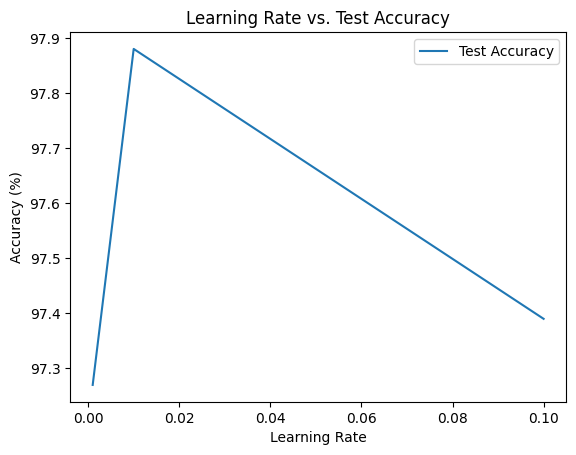

Model saved and training complete.


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import Subset
import matplotlib.pyplot as plt
import time

# 检查是否有可用的GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 定义超参数
batch_size = 64
learning_rate = 0.01
epochs = 10

# 数据预处理和加载
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# 加载数据集
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# 选择部分训练集进行训练
subset_indices = torch.randperm(len(train_dataset))[:12000]  # 选择12000个样本
train_subset = Subset(train_dataset, subset_indices)

train_loader = torch.utils.data.DataLoader(dataset=train_subset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# 定义卷积神经网络模型
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# 创建模型、定义损失函数和优化器
model = CNN().to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# 训练模型
def train(model, train_loader, criterion, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)  # 将数据和目标移动到GPU
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

# 测试模型
def test(model, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)  # 将数据和目标移动到GPU
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.0f}%)\n')
    return test_loss, accuracy

# 记录损失和准确率
train_losses = []
test_losses = []
test_accuracies = []

for epoch in range(1, epochs + 1):
    start_time = time.time()
    train(model, train_loader, criterion, optimizer, epoch)
    test_loss, test_accuracy = test(model, test_loader, criterion)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    end_time = time.time()
    
    epoch_duration = end_time - start_time
    print(f"Epoch {epoch} completed in {epoch_duration:.2f} seconds")

    # 估算剩余时间
    remaining_epochs = epochs - epoch
    remaining_time = remaining_epochs * epoch_duration
    print(f"Estimated remaining time: {remaining_time/60:.2f} minutes")

# 绘制损失和准确率曲线
plt.figure()
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Test Loss over Epochs')
plt.legend()
plt.show()

plt.figure()
plt.plot(range(1, epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy over Epochs')
plt.legend()
plt.show()

# 学习率对测试准确率的影响
learning_rates = [0.001, 0.01, 0.1]
accuracy_lr = []

for lr in learning_rates:
    optimizer = optim.SGD(model.parameters(), lr=lr)
    for epoch in range(1, epochs + 1):
        train(model, train_loader, criterion, optimizer, epoch)
        _, test_accuracy = test(model, test_loader, criterion)
    accuracy_lr.append(test_accuracy)

plt.figure()
plt.plot(learning_rates, accuracy_lr, label='Test Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy (%)')
plt.title('Learning Rate vs. Test Accuracy')
plt.legend()
plt.show()

# 保存模型
torch.save(model.state_dict(), 'mnist_cnn.pth')
print("Model saved and training complete.")


In [4]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from tkinter import *
from tkinter import filedialog
from PIL import Image, ImageTk, ImageDraw
import numpy as np

# 检查是否有可用的GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 定义超参数
batch_size = 64

# 数据预处理和加载
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# 加载MNIST测试数据集
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# 定义卷积神经网络模型
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# 创建模型并加载训练好的权重
model = CNN().to(device)
model.load_state_dict(torch.load('mnist_cnn.pth', map_location=device))
model.eval()

# GUI界面实现
class App:
    def __init__(self, root):
        self.root = root
        self.root.title("MNIST Digit Recognition")
        
        # Canvas for drawing digit
        self.canvas = Canvas(root, width=200, height=200, bg='white')
        self.canvas.grid(row=0, column=0, padx=20, pady=20)
        self.canvas.bind("<B1-Motion>", self.paint)
        
        # Buttons
        self.btn_recognize = Button(root, text="Recognize", command=self.recognize)
        self.btn_recognize.grid(row=1, column=0, padx=20, pady=20)
        
        self.btn_clear = Button(root, text="Clear", command=self.clear)
        self.btn_clear.grid(row=2, column=0, padx=20, pady=20)
        
        self.btn_load = Button(root, text="Load Image", command=self.load_image)
        self.btn_load.grid(row=3, column=0, padx=20, pady=20)
        
        # Label for showing result
        self.label_result = Label(root, text="Result: ", font=("Helvetica", 16))
        self.label_result.grid(row=4, column=0, padx=20, pady=20)
        
        # Image drawing
        self.image = Image.new("L", (200, 200), 255)
        self.draw = ImageDraw.Draw(self.image)
        
    def paint(self, event):
        x1, y1 = (event.x - 1), (event.y - 1)
        x2, y2 = (event.x + 1), (event.y + 1)
        self.canvas.create_oval(x1, y1, x2, y2, fill="black", width=10)
        self.draw.line([x1, y1, x2, y2], fill="black", width=10)
        
    def clear(self):
        self.canvas.delete("all")
        self.image = Image.new("L", (200, 200), 255)
        self.draw = ImageDraw.Draw(self.image)
        self.label_result.config(text="Result: ")
        
    def recognize(self):
        self.image = self.image.resize((28, 28), Image.ANTIALIAS)
        self.image = np.array(self.image)
        self.image = transform(self.image).unsqueeze(0).to(device)
        output = model(self.image)
        pred = output.argmax(dim=1).item()  # 修改这一行
        self.label_result.config(text=f"Result: {pred}")
        
    def load_image(self):
        file_path = filedialog.askopenfilename()
        if file_path:
            img = Image.open(file_path).convert("L")
            img = img.resize((28, 28), Image.ANTIALIAS)
            img = np.array(img)
            img = transform(img).unsqueeze(0).to(device)
            output = model(img)
            pred = output.argmax(dim=1).item()  # 修改这一行
            self.label_result.config(text=f"Result: {pred}")

# 主函数
if __name__ == "__main__":
    root = Tk()
    app = App(root)
    root.mainloop()


Using device: cpu


f:\newconda\envs\tf\lib\site-packages\ipykernel_launcher.py:91: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.


模型框架

In [5]:
import torch.onnx

# 保存模型为 ONNX 格式
dummy_input = torch.randn(1, 1, 28, 28, device=device)
torch.onnx.export(model, dummy_input, "mnist_cnn.onnx")
#https://netron.app/